In [1]:
import Pygor

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--------------------------------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Welcome to Pygor!
--------------------------------------------------
To start the server:  pygor = Experimentfrontend()
New experiment created in: pygor.savedir

To take measurements use functions 
pygor.do2d, pygor.do1d and pygor.do0d.
To control use pygor.setval and pygor.getval.
Function syntax is identical to Igor!
--------------------------------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### After importing Pygor to start taking measurements you can initilise a measurement instance by running the following. Setting save data to True will create an experiment file in C:/Pygor. If you intend to use pygor for automation and not experimentation then you can set this to False to avoid filling up your computer.

In [2]:
pygor=Pygor.Experiment(savedata=True)

Name the experiment: first_exp
False


### Making a single measurement is as simple as the following line

In [3]:
pygor.do0d()

-8.291687455344105e-14

### Taking a simple 2d scan in a raster pattern can be done using the following

C:\Users\Dominic\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


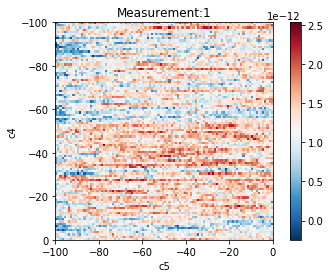

In [4]:
data = pygor.do2d("c4",-100,0,100,"c5",-100,0,100)

### Similarly taking a 1d scan can be done using the following

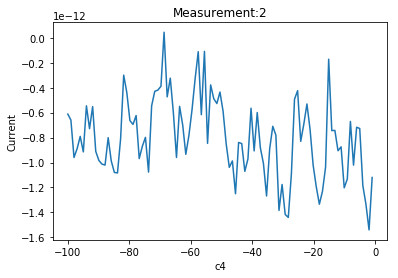

In [5]:
data1 = pygor.do1d("c4",-100,0,100)

### More do2d() examples

C:\Users\Dominic\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


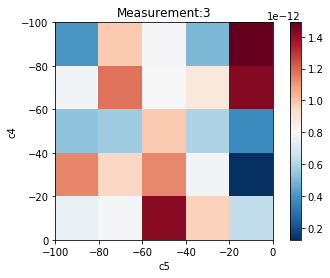

In [6]:
data2 = pygor.do2d("c4",-100,0,5,"c5",-100,0,5)

C:\Users\Dominic\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


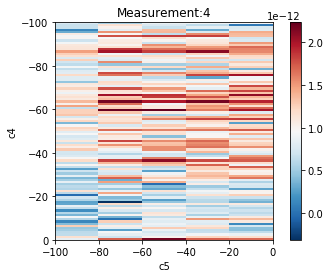

In [7]:
data3 = pygor.do2d("c4",-100,0,100,"c5",-100,0,5)

### You can queue multiple do2d() and do1d() scans in a single cell

C:\Users\Dominic\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


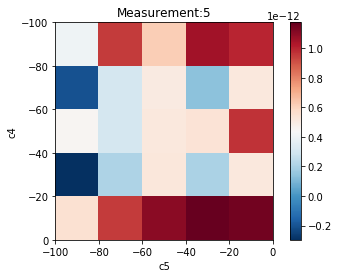

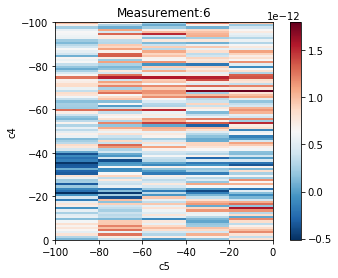

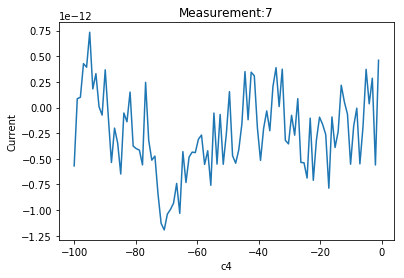

In [8]:
data4 = pygor.do2d("c4",-100,0,5,"c5",-100,0,5)
data5 = pygor.do2d("c4",-100,0,100,"c5",-100,0,5)
data6 = pygor.do1d("c4",-100,0,100)

### You can bulk set all 16 dac channles using set_params or set a single one using setval

In [9]:
pygor.set_params([-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100])
pygor.setval("c5",-500)

-500

### You can also evaluate the current values with getval and get_params

In [10]:
pygor.get_params()

[-100,
 -100,
 -100,
 -100,
 -500,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100,
 -100]

In [11]:
pygor.getval("c5")

-500

### You can use other python modules and the above to write custom measurement schemes such as this example that measures trace in random order.

In [13]:
import numpy as np                                      #import number python
vals = np.linspace(-1000,0,200)                         #create array of voltages to measure at (range 0 to -1000 in 200 steps)
indexes = np.arange(200)                                #create array of integers counting from 0 to 199
np.random.shuffle(indexes)                              #randomly shuffle integers
currents = np.zeros(200)                                #create empty array for current values
for index in indexes:                                   #loop over each value in indexes in sequence
    pygor.setval("c5",float(vals[index]))               #set gate to voltage value at index in vals
    currents[index]=pygor.do0d()                        #make measurement and store it in currents
print(currents)                                         #display measurements

[ -1.05378762e-12  -3.37674372e-13  -5.11492396e-13  -7.36521594e-13
  -1.39553621e-12  -1.68929717e-12  -5.68150774e-13  -3.38987670e-13
  -1.39185748e-12  -5.84925175e-13   3.62477820e-13  -1.03887123e-12
  -1.07005461e-12  -7.91986064e-13  -7.43550725e-13  -6.69573225e-13
  -4.52789451e-13  -4.76592984e-13  -8.70649652e-13  -9.63252110e-13
  -7.90605608e-13  -1.18696801e-12  -6.42314822e-13  -6.52828671e-13
  -5.65800268e-13   6.09639945e-15  -7.75435520e-13  -6.22272098e-13
  -2.53265104e-13  -1.18038659e-12  -2.54220230e-13  -4.33582462e-13
  -3.99056147e-13  -8.02328289e-13  -1.02526069e-12  -8.79596497e-13
  -8.41801859e-13  -4.20098768e-13  -7.78823233e-13  -6.41829797e-13
  -5.45473991e-13  -7.67212481e-13  -1.09726078e-12  -1.01100095e-12
  -9.52006993e-13  -9.93032643e-13  -8.77798173e-13  -4.35694187e-13
  -6.63902164e-13  -6.87205748e-13  -5.44421781e-14  -2.46773232e-13
  -1.74782103e-12  -1.37162075e-12  -4.94158350e-13  -3.99585943e-13
  -1.00679243e-12  -1.41179487e-14

### Similarly you can use python to write custom plotting such as this example that for the above data displays measurement path

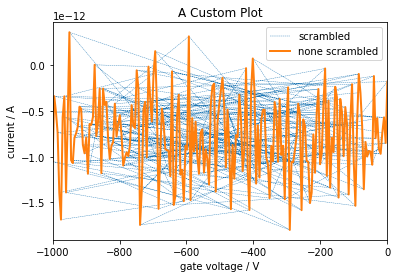

In [14]:
import matplotlib.pyplot as plt                                                #import matplotlib plotting library (if not already imported)
plt.plot(vals[indexes],currents[indexes],'--',linewidth=0.4,label='scrambled') #plot scrambled measurement order as thin dotted line
plt.plot(vals,currents,linewidth=2.0,label='none scrambled')                   #plot none scrambles measurement order as thick line
plt.xlim([-1000,0])                                                            #set xlimit (not necicary)
plt.xlabel('gate voltage / V')                                                 #set x label (for completeness)
plt.ylabel('current / A')                                                      #set y label (for completeness)
plt.title('A Custom Plot')                                                     #set title (for completeness)
plt.legend()                                                                   #add legend (for completeness)
plt.show()                                                                     #show the plot

### If you plan on using the same custom measurement scheme and plotting scheme you can define as follows

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def do1d_random(var,min1,max1,steps):
    vals = np.linspace(min1,max1,steps)                     
    indexes = np.arange(steps)                                
    np.random.shuffle(indexes)                              
    currents = np.zeros(steps)                                
    for index in indexes:                                   
        pygor.setval(var,float(vals[index]))
        currents[index]=pygor.do0d()                        
    return currents , vals , indexes 
def do1d_random_niceplot(currents , vals , indexes):
    plt.plot(vals[indexes],currents[indexes],'--',linewidth=0.4,label='scrambled')
    plt.plot(vals,currents,linewidth=2.0,label='none scrambled')                   
    plt.xlim([vals[0],vals[-1]])                                                            
    plt.xlabel('gate voltage / V')                                              
    plt.ylabel('current / A')                                                      
    plt.title('A Custom Plot')                                                 
    plt.legend()                                                             
    plt.show()         

### Now reusing them is simple

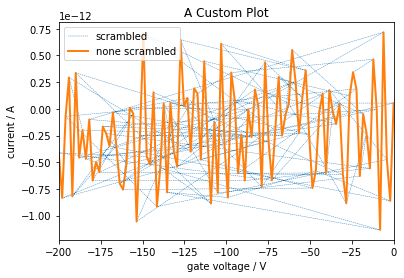

In [16]:
currents, vals, indexes = do1d_random("c10",-200,0,100)
do1d_random_niceplot(currents, vals, indexes)

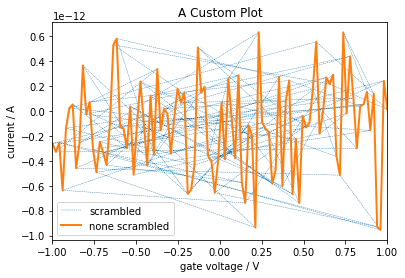

In [17]:
currents, vals, indexes = do1d_random("c1",-1,1,100)
do1d_random_niceplot(currents, vals, indexes)

### Even many times in one cell

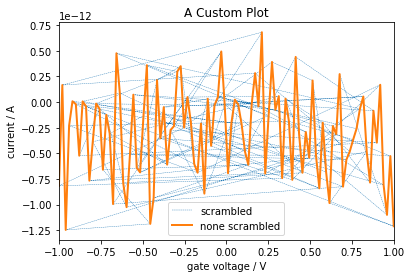

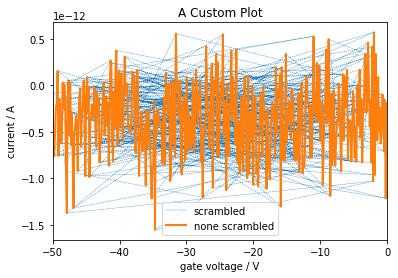

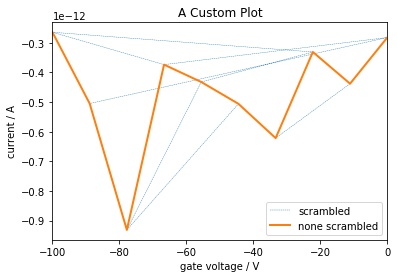

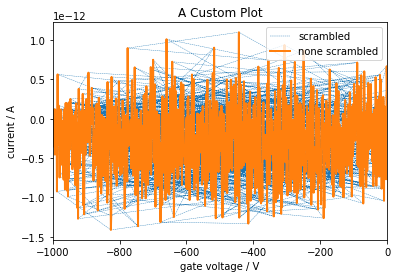

In [18]:
currents1, vals1, indexes1 = do1d_random("c2",-1,1,100)
currents2, vals2, indexes2 = do1d_random("c3",-50,0,400)
currents3, vals3, indexes3 = do1d_random("c4",-100,0,10)
currents4, vals4, indexes4 = do1d_random("c5",-1000,0,1000)
do1d_random_niceplot(currents1, vals1, indexes1)
do1d_random_niceplot(currents2, vals2, indexes2)
do1d_random_niceplot(currents3, vals3, indexes3)
do1d_random_niceplot(currents4, vals4, indexes4)

## Things to remember if you're not used to python:
- If you want to use data returned from a plot make sure to asigne it to a variable (eg. variable1 = pygor.do0d())
- All variables are remebered across cells (eg. using current = pygor.do2d() in cells will overwrite current)
- Remeber to save and checkpoint the notebook in order to not loose variables
- If you do find variables containing 1d and 2d scans are blank they are saved in the pygor directory